# House price prediction

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [118]:
df=pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [119]:
print(df.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some columns have a lot of null values.
### Imputing Null values
There are columns where null values have significance. We need to impute at those columns.

In [121]:
null_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_meaning:
    df[i].fillna("None", inplace=True)

### Imputing numeric NaN Values

These are the real NaN values that can be imputed with median values.

In [122]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna("None", inplace=True)

In [123]:
df=df.drop('LotFrontage',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

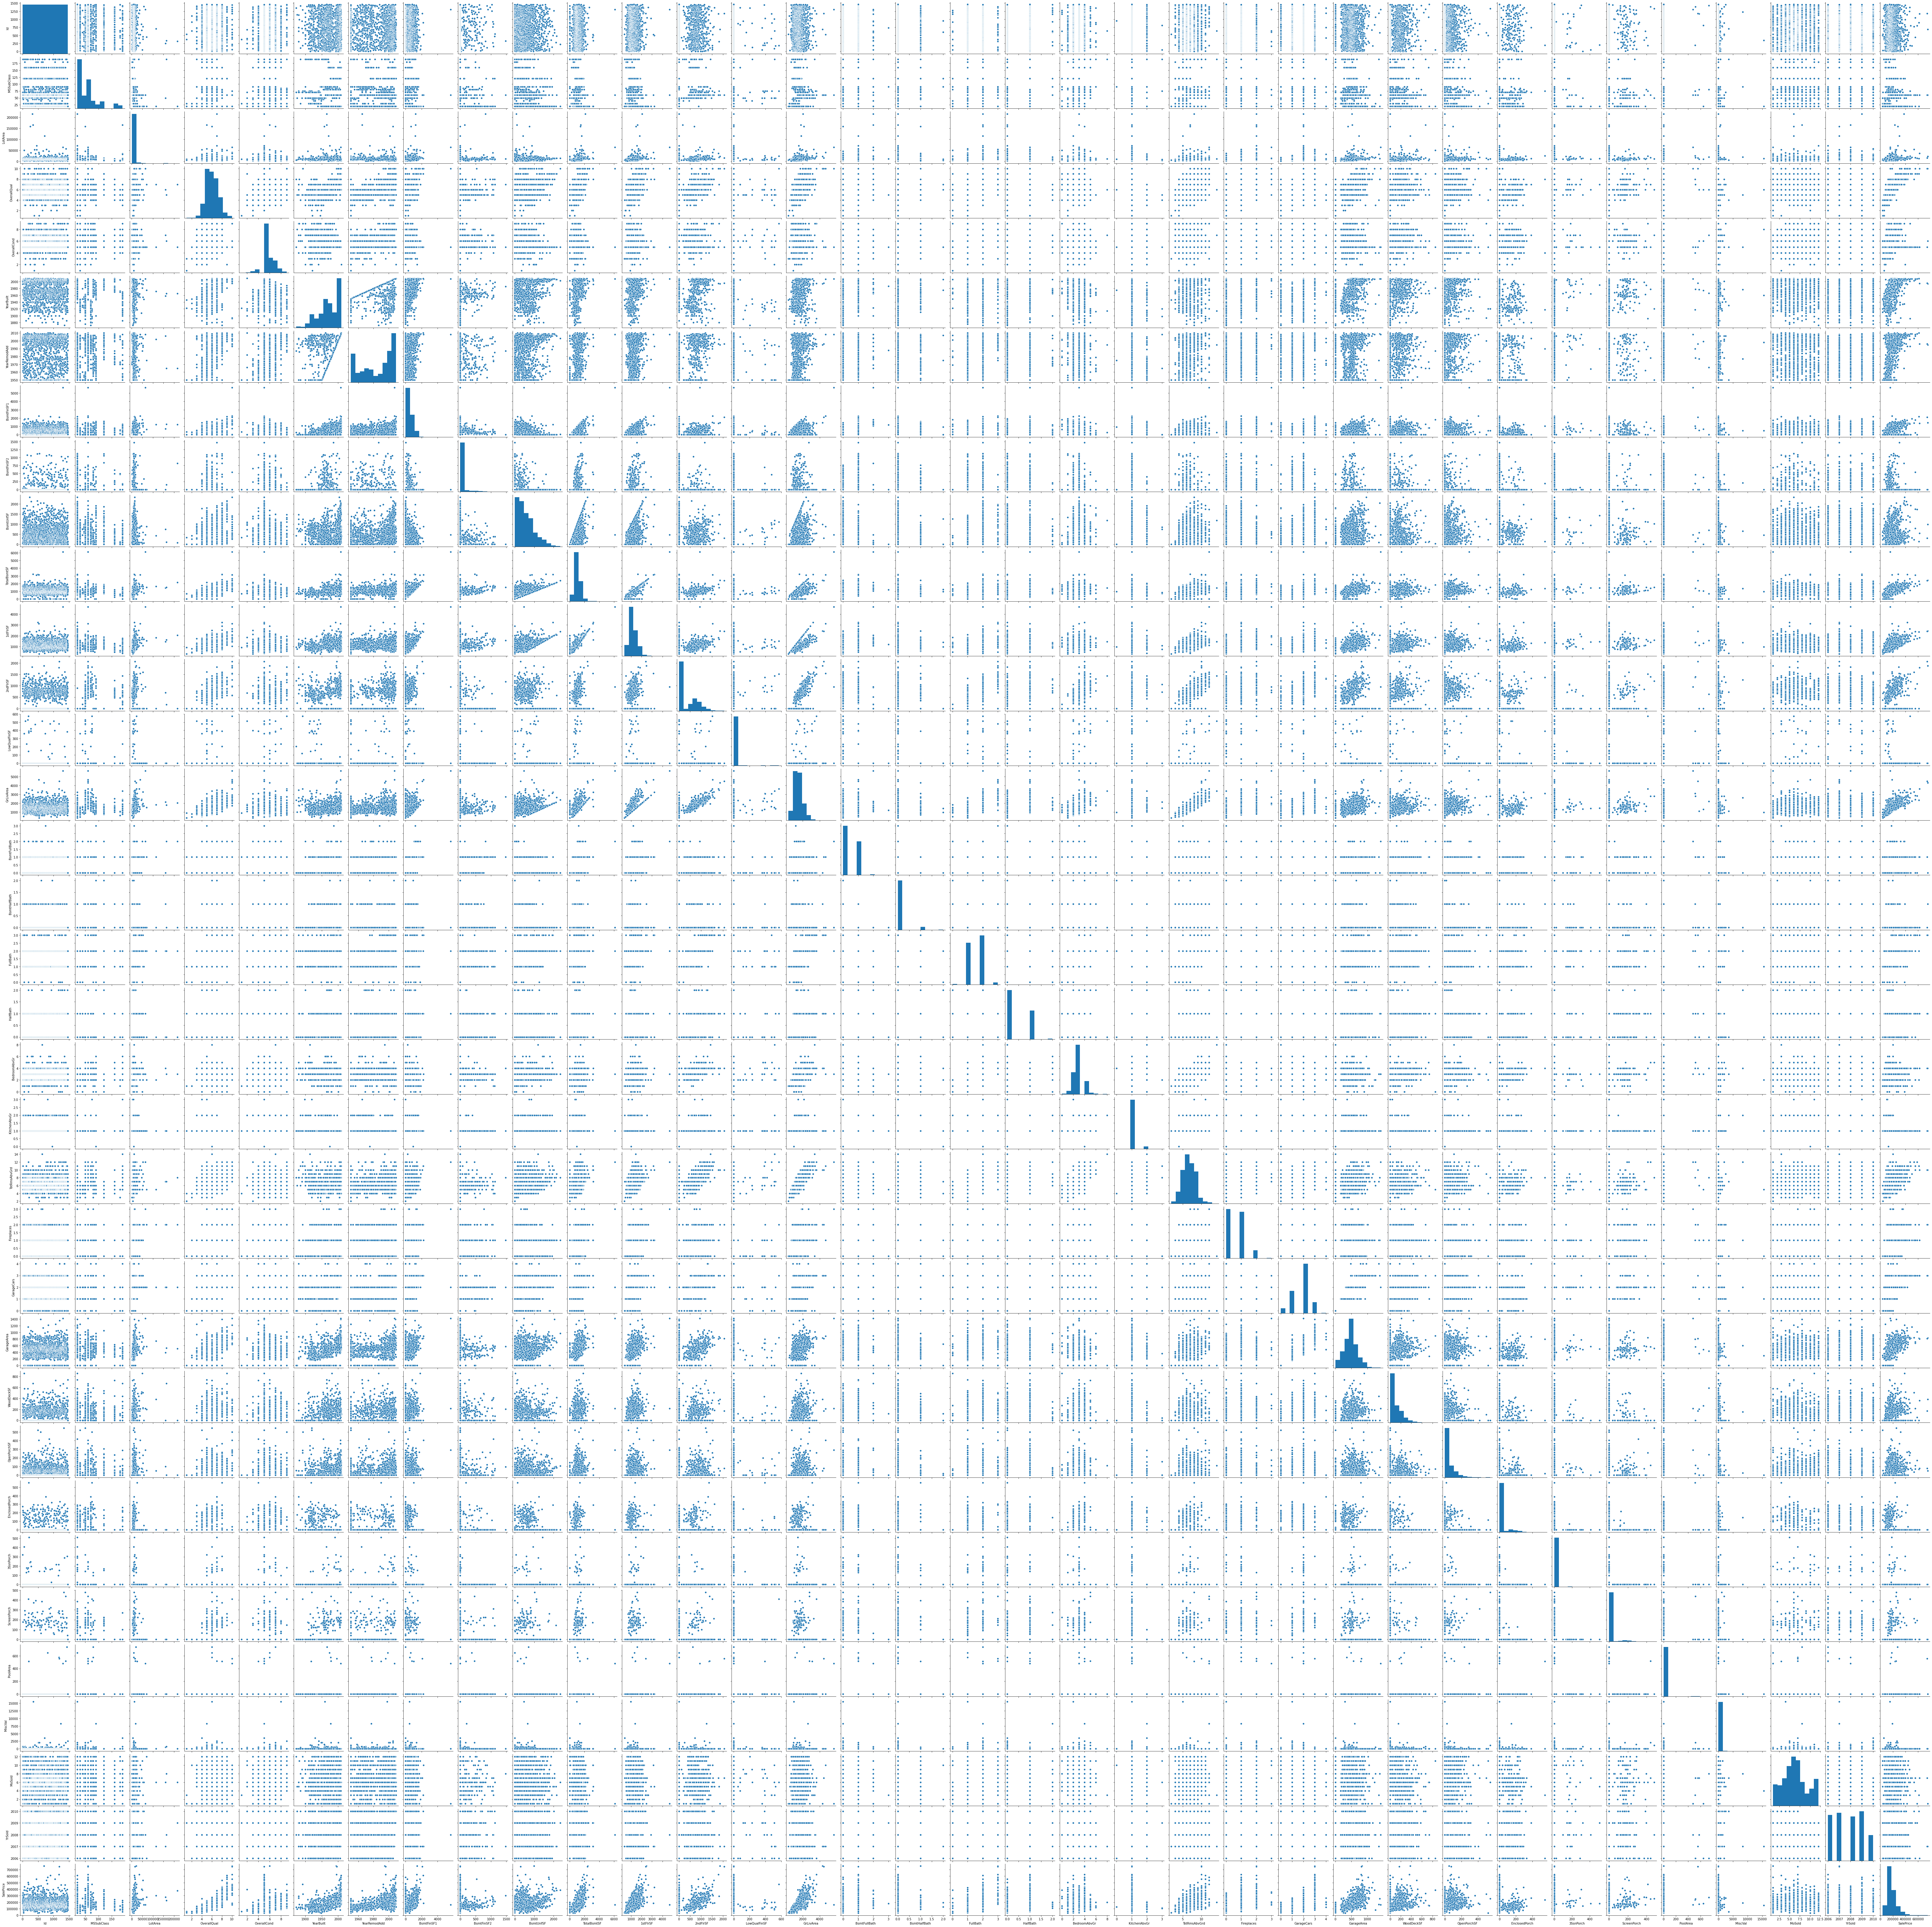

In [124]:
# visualizing through a pairplot
df_num=df.select_dtypes(include='int')
sns.pairplot(df_num)

In [125]:
# making heat map to map correlations
df_corr=df.corr()
df_corr

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
MasVnrArea    -0.051071    0.023573  0.103321     0.407252    -0.125694   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageYrBlt   -0.000122    0.081396 -0.025865     0.514231    -0.306276   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id             -0.012713     -0.021998   -0.051071   -0.005024   -0.005968   
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.339850    0.445863    0.097117   
2ndFlrSF        0.010308      0.140024    0.173800   -0.137079   -0.099260   


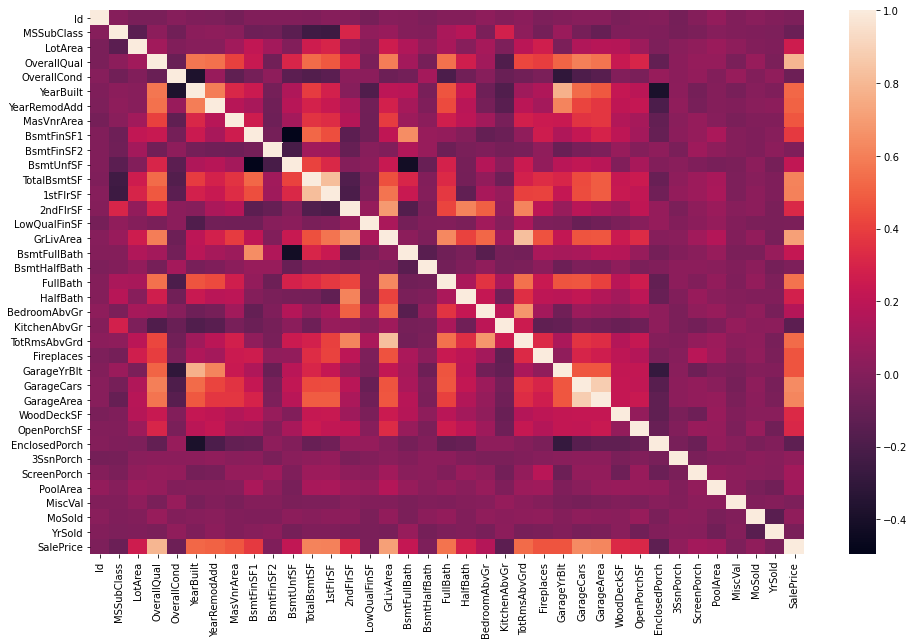

In [126]:
# building a heat map
plt.figure(figsize=(16,10))
sns.heatmap(df_corr)

In [127]:
# splitting into X and y
y=df.pop('SalePrice')
X=df

#splitting into train_test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=5)
print(X_train.shape,X_test.shape)

(1021, 79) (438, 79)


In [128]:
# scaling features
scale=MinMaxScaler()
df_num=df_num.drop('SalePrice',axis=1)
X_num=scale.fit_transform(df_num)
df[df_num.columns]=X_num
df.head()

Id  MSSubClass MSZoning   LotArea Street Alley LotShape LandContour  \
0  0.000000    0.235294       RL  0.033420   Pave  None      Reg         Lvl   
1  0.000685    0.000000       RL  0.038795   Pave  None      Reg         Lvl   
2  0.001371    0.235294       RL  0.046507   Pave  None      IR1         Lvl   
3  0.002056    0.294118       RL  0.038561   Pave  None      IR1         Lvl   
4  0.002742    0.235294       RL  0.060576   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0    AllPub    Inside  ...         0.0      0.0   None  None        None   
1    AllPub       FR2  ...         0.0      0.0   None  None        None   
2    AllPub    Inside  ...         0.0      0.0   None  None        None   
3    AllPub    Corner  ...         0.0      0.0   None  None        None   
4    AllPub       FR2  ...         0.0      0.0   None  None        None   

  MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0     0.0  0.090909    0.50        WD         Normal  
1     0.0  0.363636    0.25        WD         Normal  
2     0.0  0.727273    0.50        WD         Normal  
3     0.0  0.090909    0.00        WD        Abnorml  
4     0.0  1.000000    0.50        WD         Normal  

[5 rows x 79 columns]

In [129]:
# dummy variable creation
x_cat=X_train.select_dtypes(include='object')
print(len(x_cat.columns))
X_cat=pd.get_dummies(x_cat)
X_train=pd.concat([X_train,X_cat],axis=1)
print(X_train.shape)
X_train=X_train.drop(x_cat.columns,axis=1)
print(X_train.shape)
X_train.head()

x_cat=X_test.select_dtypes(include='object')
print(len(x_cat.columns))
X_cat=pd.get_dummies(x_cat)
X_test=pd.concat([X_test,X_cat],axis=1)
print(X_test.shape)
X_test=X_test.drop(x_cat.columns,axis=1)
print(X_test.shape)
X_test.head()

43
(1021, 341)
(1021, 298)
43
(438, 314)
(438, 271)


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
756    757          60    10769            8            5       2007   
923    924         120     8012            6            5       1993   
1423  1424          80    19690            6            7       1966   
217    218          70     9906            4            4       1925   
653    654          50    10320            6            7       1906   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
756           2007         0.0          20           0  ...               0   
923           1994         0.0         165         841  ...               0   
1423          1966         0.0           0           0  ...               0   
217           1950         0.0           0           0  ...               0   
653           1995         0.0           0           0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
756              0             0            1                      0   
923              0             0            1                      0   
1423             0             0            1                      0   
217              0             0            1                      0   
653              0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
756                       0                     0                     0   
923                       0                     0                     0   
1423                      0                     1                     0   
217                       0                     0                     1   
653                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
756                      1                      0  
923                      1                      0  
1423                     0                      0  
217                      0                      0  
653                      1                      0  

[5 rows x 271 columns]

### Building a model

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
lr.fit(X_train,y_train)
lasso=Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds=5

model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
print(model_cv.best_score_)
print(model_cv.best_params_)

-17465.612090434508
{'alpha': 100}


In [132]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.150050      0.011931         0.003304        0.000048      0.0001   
1       0.145103      0.009006         0.003397        0.000116       0.001   
2       0.142930      0.012920         0.003582        0.000221        0.01   
3       0.140518      0.008071         0.003685        0.000489        0.05   
4       0.146713      0.010870         0.003715        0.000539         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20662.667507      -20765.493775      -17469.122640   
1   {'alpha': 0.001}      -20663.106240      -20760.243893      -17468.917357   
2    {'alpha': 0.01}      -20667.480596      -20745.257473      -17466.883951   
3    {'alpha': 0.05}      -20682.565996      -20793.335396      -17456.612038   
4     {'alpha': 0.1}      -20667.508761      -20792.786832      -17442.582227   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -21702.497992  ...    -20929.574171     2116.385217               28   
1      -21710.871053  ...    -20927.279294     2112.774234               27   
2      -21744.697952  ...    -20913.317700     2089.608670               26   
3      -21739.620175  ...    -20909.714734     2072.643779               25   
4      -21732.746870  ...    -20879.160606     2044.074390               24   

   split0_train_score  split1_train_score  split2_train_score  \
0       -12449.009457       -12156.660893       -12493.068135   
1       -12449.029853       -12156.672974       -12493.074414   
2       -12449.386866       -12156.903026       -12493.151370   
3       -12451.778862       -12158.287683       -12493.806585   
4       -12454.627604       -12160.238469       -12494.745051   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -12093.575932       -11726.062654     -12183.675414       277.266352  
1       -12093.596499       -11726.081881     -12183.691124       277.263738  
2       -12093.885333       -11726.413885     -12183.948096       277.216412  
3       -12095.017620       -11728.181668     -12185.414484       277.137141  
4       -12096.305163       -11730.334835     -12187.250225       277.061742  

[5 rows x 21 columns]

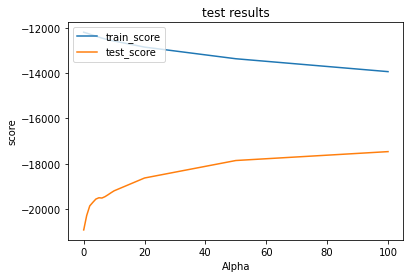

In [133]:
# visualising
#plt.figure(figsize=(16,6))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results.param_alpha,cv_results.mean_train_score)
plt.plot(cv_results.param_alpha,cv_results.mean_test_score)
plt.xlabel('Alpha')
plt.ylabel('score')
plt.title("test results")
plt.legend(['train_score','test_score'],loc= 'upper left')
plt.show()

In [134]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-1.62938484e+00, -1.51468265e+02,  4.27409693e-01,  7.24407523e+03,
        6.02468916e+03,  3.65564011e+02,  5.67404069e+01,  1.32455190e+01,
        2.49217066e+01,  1.85424398e+01,  8.66074016e+00,  5.24591335e+00,
        4.37681303e+01,  4.60243317e+01,  1.44787393e+01,  5.90029867e+00,
        2.57812868e+03, -3.70482052e+03,  6.02700324e+03,  2.44264506e+03,
       -5.71947198e+03, -1.12304748e+04,  3.46558671e+03,  7.03878101e+03,
        2.90627397e+01,  6.13632356e+03,  3.87792042e+00,  1.45690633e+01,
       -4.60680916e-01, -6.67401424e+00,  1.10043084e+01,  5.75054803e+01,
        2.95472348e+01, -3.11624413e+00, -2.87671803e+02,  2.25825360e+01,
       -0.00000000e+00,  1.32741240e+04, -0.00000000e+00,  3.57284204e+03,
       -0.00000000e+00, -1.07893734e+04,  0.00000000e+00, -0.00000000e+00,
        5.08502807e+01, -2.19394866e+03, -4.13365944e+02,  5.90641110e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.81182522e+03,  